## Pymaceuticals 
## Observations and Insights 
1. According to the outlier and IQR calculations, Capomulin and Ramicane are the most effective drug regmiens. The tumor volumes are at their least on average on these regimens. 
2. Given that both Capomulin and Ramicane have the most tested timepoints, it may be that other drugs are just as effective, if not more effective, given further testing. 
3. According to the calculated correlation coefficient (0.84), a strong linear correlation was observed between the weight of the mouse and tumor volume.This fact is visualized in the last scatter plot. 

In [75]:
# Dependencies and Setup
from matplotlib import pyplot as plt
import pandas as pd
import numpy as np 
from scipy.stats import linregress

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
mouse_study_df = pd.merge(study_results, mouse_metadata, how = "left", on = "Mouse ID")
# Display the data table for preview
mouse_study_df.head(5)

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [25]:
# Checking the number of mice.
mouse_study_df['Mouse ID'].value_counts()

g989    13
b128    10
q787    10
s337    10
q511    10
        ..
f932     1
b447     1
u153     1
t573     1
o848     1
Name: Mouse ID, Length: 249, dtype: int64

In [26]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
dup_mouse = mouse_study_df.duplicated(subset=["Mouse ID","Timepoint"])
mouse_df = pd.DataFrame(mouse_study_df, columns=["Mouse ID","Timepoint"])

dupmice = mouse_df[mouse_df.duplicated()]

dupmice


,Mouse ID,Timepoint
137,g989,0
360,g989,5
681,g989,10
869,g989,15
1111,g989,20


In [27]:
# Optional: Get all the data for the duplicate mouse ID. 
dupdata = mouse_study_df.loc[mouse_study_df["Mouse ID"] == "g989",:]
dupdata

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
107,g989,0,45.000000,0,Propriva,Female,21,26
137,g989,0,45.000000,0,Propriva,Female,21,26
329,g989,5,48.786801,0,Propriva,Female,21,26
360,g989,5,47.570392,0,Propriva,Female,21,26
620,g989,10,51.745156,0,Propriva,Female,21,26
681,g989,10,49.880528,0,Propriva,Female,21,26
815,g989,15,51.325852,1,Propriva,Female,21,26
869,g989,15,53.442020,0,Propriva,Female,21,26
950,g989,20,55.326122,1,Propriva,Female,21,26
1111,g989,20,54.657650,1,Propriva,Female,21,26


In [28]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_study_df = mouse_study_df.loc[mouse_study_df["Mouse ID"] != "g989", :]
clean_study_df.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [29]:
# Checking the number of mice in the clean DataFrame.
clean_study_df['Mouse ID'].value_counts()

b128    10
q787    10
c559    10
s337    10
q511    10
        ..
n482     1
t573     1
f932     1
o848     1
x336     1
Name: Mouse ID, Length: 248, dtype: int64

## Summary Statistics

In [30]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary dataframe.
sum_stats = clean_study_df.groupby(['Drug Regimen'])
tumor_mean = sum_stats["Tumor Volume (mm3)"].mean()
tumor_med = sum_stats["Tumor Volume (mm3)"].median()
tumor_var = sum_stats["Tumor Volume (mm3)"].var()
tumor_stdd = sum_stats["Tumor Volume (mm3)"].std()
tumor_sem = sum_stats["Tumor Volume (mm3)"].sem()

tumor_df = pd.DataFrame({"Mean":tumor_mean,"Median":tumor_med,"Variance":tumor_var,"Standard Deviation":tumor_stdd,"SEM":tumor_sem})

tumor_df.head()

,Mean,Median,Variance,Standard Deviation,SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466


In [31]:
# Using the aggregation method, produce the same summary statistics in a single line
study_agg = clean_study_df.groupby(["Drug Regimen"])["Tumor Volume (mm3)"].agg(["mean","median","var","std","sem"])
study_agg

,mean,median,var,std,sem
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

<IPython.core.display.Javascript object>


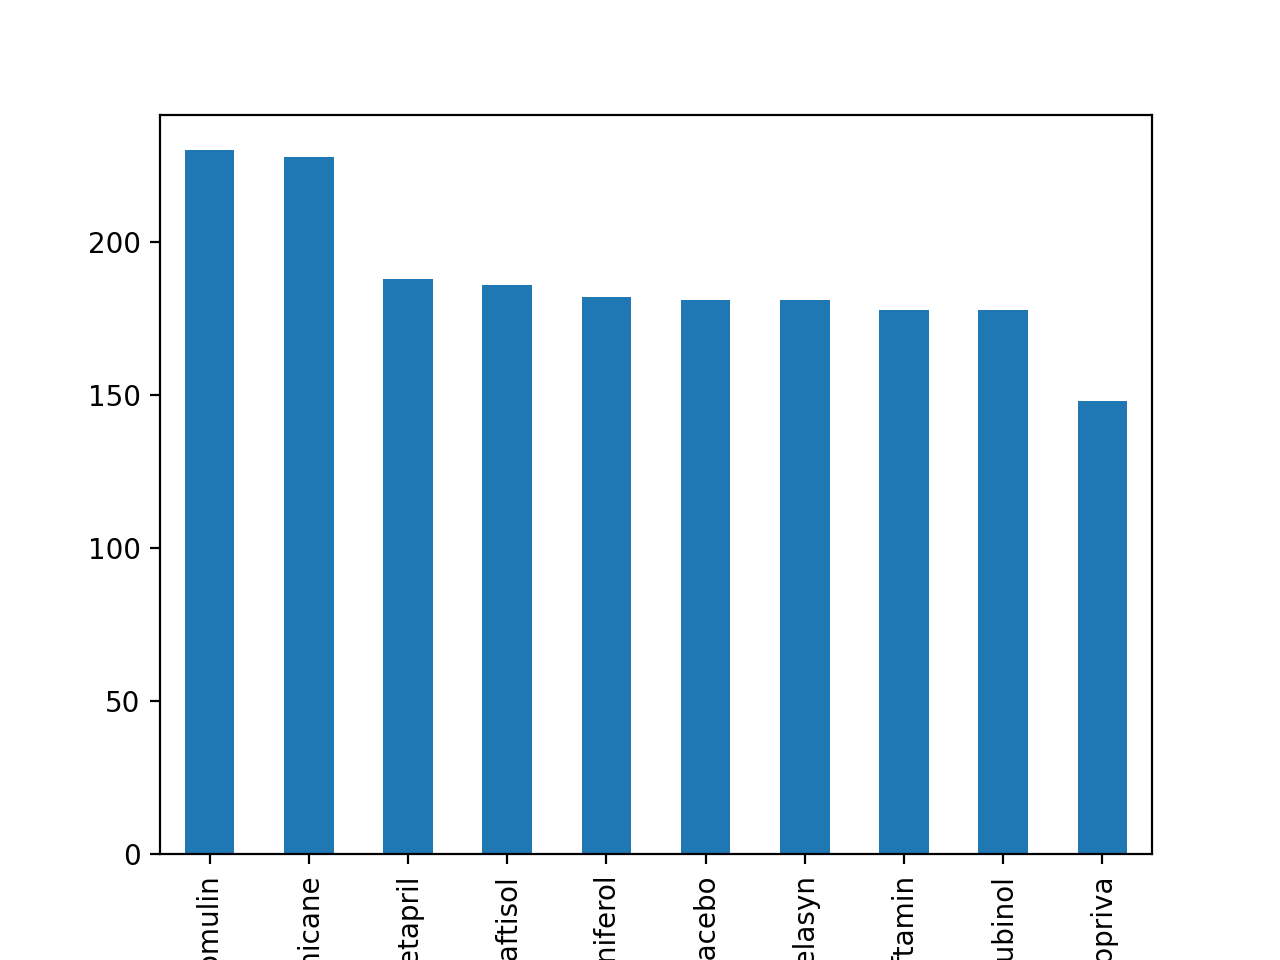

In [36]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using Pandas.

mice_drug = clean_study_df.groupby(['Drug Regimen'])['Timepoint'].count()
mice_drug.sort_values(ascending=False).plot.bar()
plt.show()

<IPython.core.display.Javascript object>


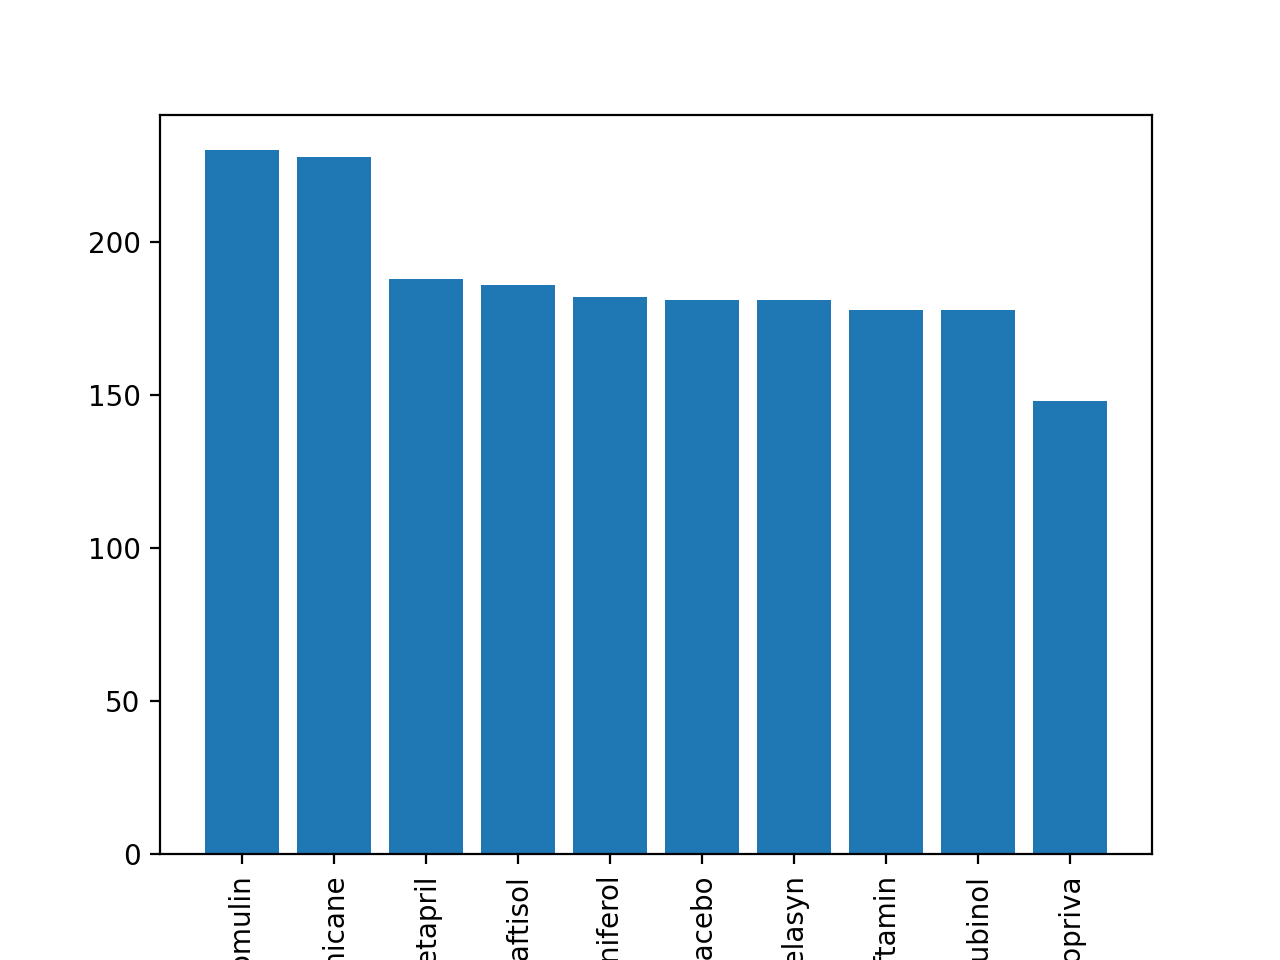

In [37]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using pyplot.
mice_drug2 = mice_drug.sort_values(ascending=False) 
plt.bar(mice_drug2.index, mice_drug2.values)
plt.xlabel ('Drug Regimen')
plt.xticks(rotation='vertical')
plt.show()


In [38]:
#Create groupby gender 
mice_gender = clean_study_df.groupby("Sex")
gender_count = pd.DataFrame(mice_gender["Sex"].count())
gender_count.head()


,Sex
Sex,
Female,922
Male,958


<IPython.core.display.Javascript object>


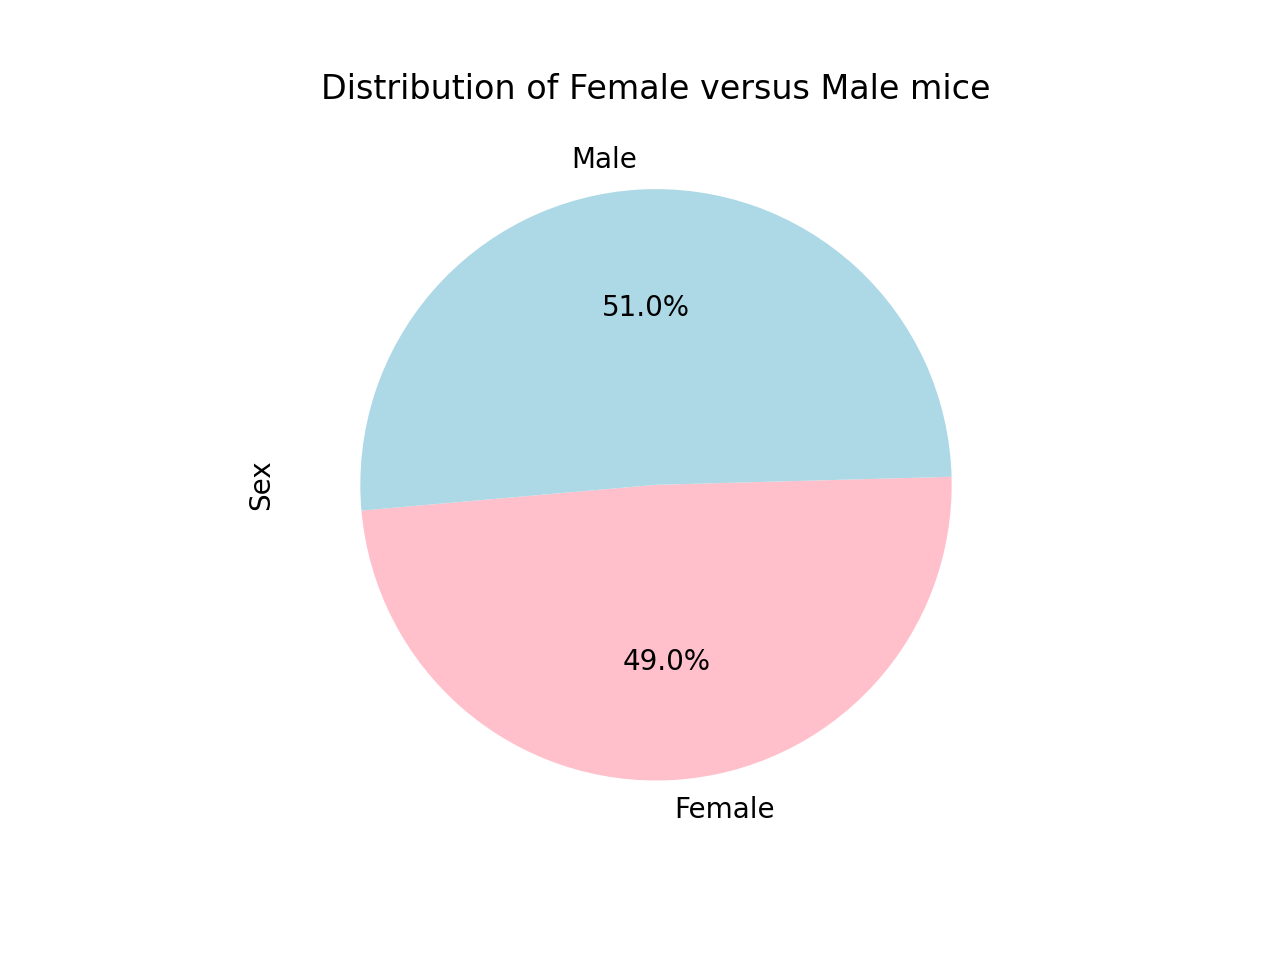

In [42]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
gender_count.plot(kind='pie', y='Sex', title="Distribution of Female versus Male mice",startangle=185,\
                        autopct='%1.1f%%',shadow=False, fontsize=10, colors =["pink","lightblue"],legend =False)
plt.show()

<IPython.core.display.Javascript object>


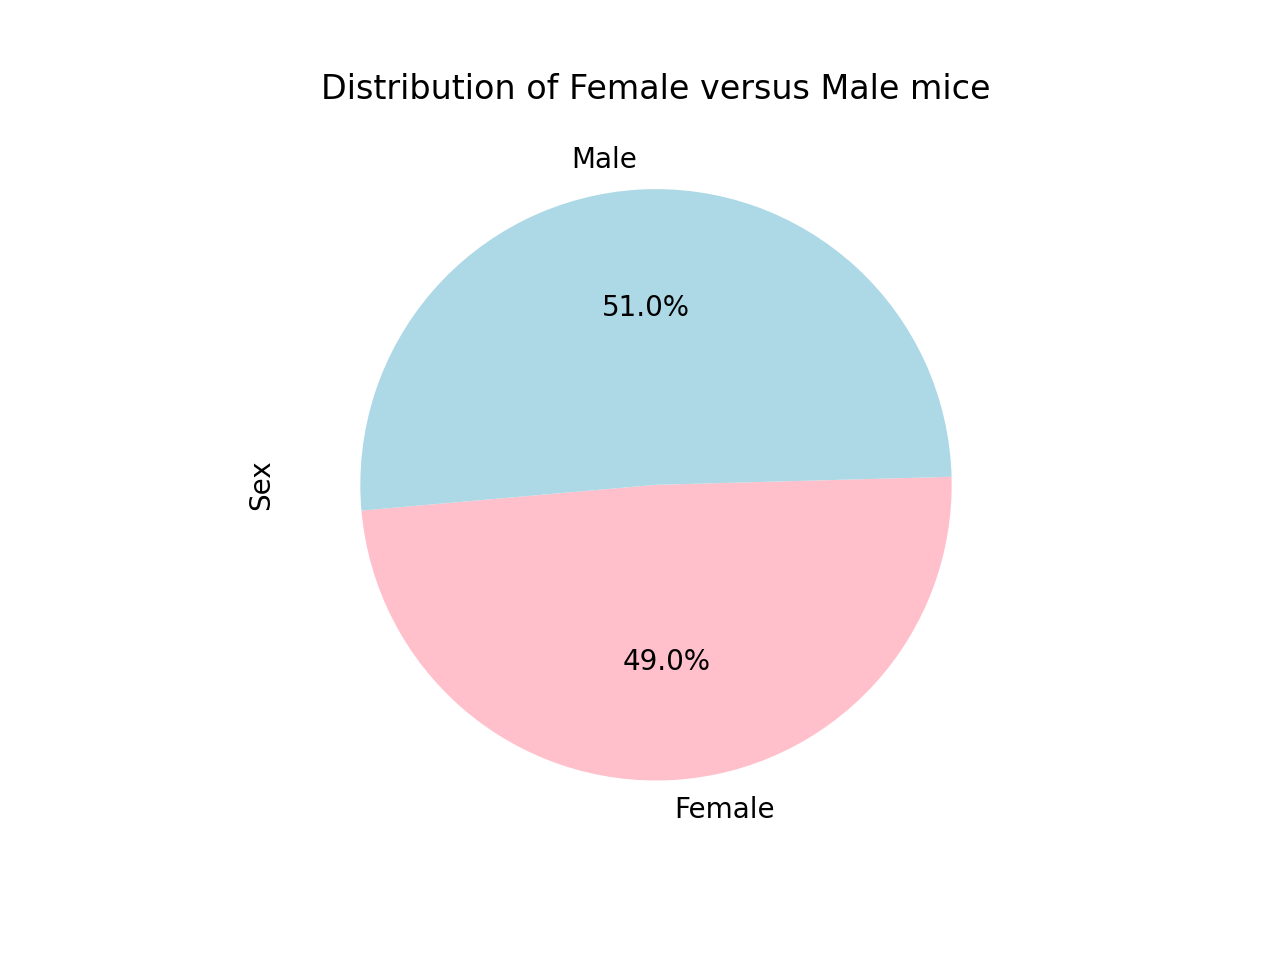

In [43]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot

gender = list(gender_count.index.values)
gendercounts = gender_count["Sex"]
colors = ["pink", "lightblue"]
plt.pie(gendercounts, labels=gender, colors=colors,
        autopct="%1.1f%%", shadow=False, startangle=185)
plt.rcParams['font.size'] = 10
plt.title("Distribution of Female versus Male mice")
plt.ylabel("Sex")
plt.show()

## Quartiles, Outliers and Boxplots

In [52]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  

# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse
copy_mousestudy_df = mouse_study_df.copy()
mouse_check = copy_mousestudy_df.loc[(copy_mousestudy_df["Mouse ID"] == "a203"), :]
mouse_check

mouseid_df = copy_mousestudy_df.groupby("Mouse ID")["Mouse ID"].unique()
timepoint_df = copy_mousestudy_df.groupby("Mouse ID")["Timepoint"].max()

grt_timepoint_df = pd.DataFrame({"Timepoint": timepoint_df})
grt_timepoint_df.reset_index()
# Merge this group df with the original dataframe to get the tumor volume at the last timepoint

final_tumor_df = pd.merge(grt_timepoint_df, mouse_study_df, how = "left", on = ["Mouse ID", "Timepoint"])
final_tumor_df

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,a203,45,67.973419,2,Infubinol,Female,20,23
1,a251,45,65.525743,1,Infubinol,Female,21,25
2,a262,45,70.717621,4,Placebo,Female,17,29
3,a275,45,62.999356,3,Ceftamin,Female,20,28
4,a366,30,63.440686,1,Stelasyn,Female,16,29
...,...,...,...,...,...,...,...,...
244,z435,10,48.710661,0,Propriva,Female,12,26
245,z578,45,30.638696,0,Ramicane,Male,11,16
246,z581,45,62.754451,3,Infubinol,Female,24,25
247,z795,45,65.741070,3,Naftisol,Female,13,29


In [61]:
# Put treatments into a list for for loop (and later for plot labels)
drug_list = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]

# Create empty list to fill with tumor vol data (for plotting)
tumor_vol = []

# Calculate the IQR and quantitatively determine if there are any potential outliers. 
for drug in drug_list:
    
    # Locate the rows which contain mice on each drug and get the tumor volumes
    end_treatment = final_tumor_df.loc[final_tumor_df["Drug Regimen"] == drug]
    
    tumor_vol.append(end_treatment["Tumor Volume (mm3)"])
    # add subset 
 
    
    # Determine outliers using upper and lower bounds
    for index, drug in enumerate(tumor_vol):
        drug_name = drug_list[index]
    
        quartiles = drug.quantile([.25,.5,.75])
        lowerqtr = quartiles[0.25]
        upperqtr = quartiles[0.75]
        iqr = upperqtr-lowerqtr
    
        print(f"The lower quartile of {drug_name} is: {round(lowerqtr,2)}.")
        print(f"The upper quartile of {drug_name} is: {round(upperqtr,2)}.")
        print(f"The interquartile range of {drug_name} is: {round(iqr,2)}.")
        print(f"The the median of {drug_name} is: {round(quartiles[0.5],2)}.")
    
        lowerbound = lowerqtr - (1.5*iqr)
        upperbound = upperqtr + (1.5*iqr)
        print(f"Values below {round(lowerbound,2)} could be outliers for {drug_name}.")
        print(f"Values above {round(upperbound,2)} could be outliers for {drug_name}.")
        outliers = (final_tumor_df.loc[(final_tumor_df["Drug Regimen"] == drug_name) & ((final_tumor_df["Tumor Volume (mm3)"] < lowerbound) | (final_tumor_df["Tumor Volume (mm3)"] > upperbound))])
        outliers_no = len(outliers)
        print(f"The number of outliers for {drug_name} is: {outliers_no}.")
        if outliers_no > 0:
            outlier_list = outliers["Mouse ID"].to_numpy()
            print(f"The outliers are: {outlier_list}.")
        print("")

The lower quartile of Capomulin is: 32.38.
The upper quartile of Capomulin is: 40.16.
The interquartile range of Capomulin is: 7.78.
The the median of Capomulin is: 38.13.
Values below 20.7 could be outliers for Capomulin.
Values above 51.83 could be outliers for Capomulin.
The number of outliers for Capomulin is: 0.

The lower quartile of Capomulin is: 32.38.
The upper quartile of Capomulin is: 40.16.
The interquartile range of Capomulin is: 7.78.
The the median of Capomulin is: 38.13.
Values below 20.7 could be outliers for Capomulin.
Values above 51.83 could be outliers for Capomulin.
The number of outliers for Capomulin is: 0.

The lower quartile of Ramicane is: 31.56.
The upper quartile of Ramicane is: 40.66.
The interquartile range of Ramicane is: 9.1.
The the median of Ramicane is: 36.56.
Values below 17.91 could be outliers for Ramicane.
Values above 54.31 could be outliers for Ramicane.
The number of outliers for Ramicane is: 0.

The lower quartile of Capomulin is: 32.38.
The 

<IPython.core.display.Javascript object>


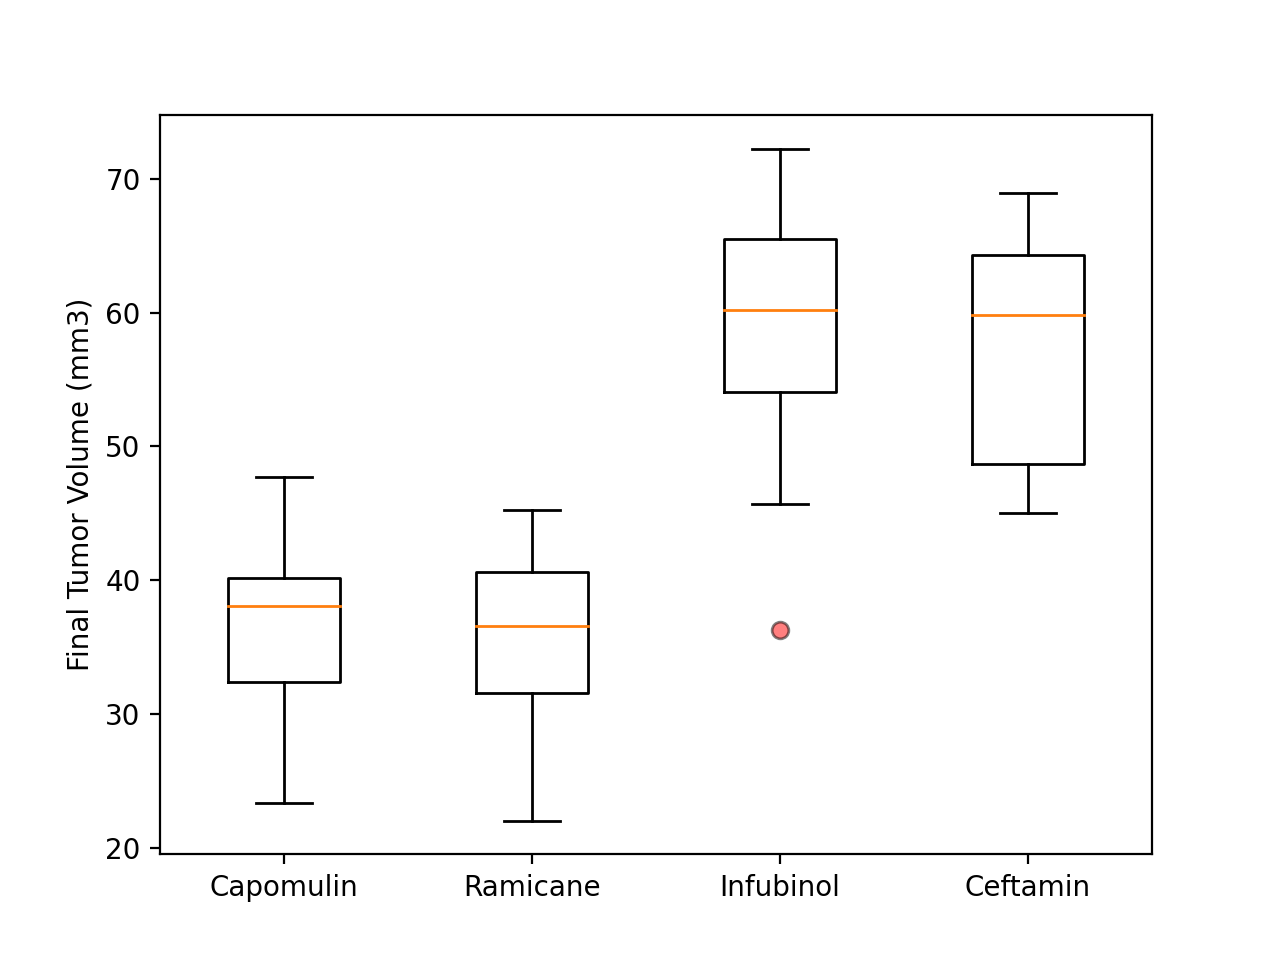

/var/folders/4r/206mbfb173g_vn37yfldpzd80000gn/T/ipykernel_38580/4101465414.py:4: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(drug_list)


In [68]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
fig1, ax = plt.subplots()
ax.set_ylabel("Final Tumor Volume (mm3)")
ax.set_xticklabels(drug_list)
bp = ax.boxplot(tumor_vol)
for flier in bp["fliers"]:
    flier.set(marker="o", markeredgecolor="black", markerfacecolor="red",alpha=0.5)
plt.show()

## Line and Scatter Plots

<IPython.core.display.Javascript object>


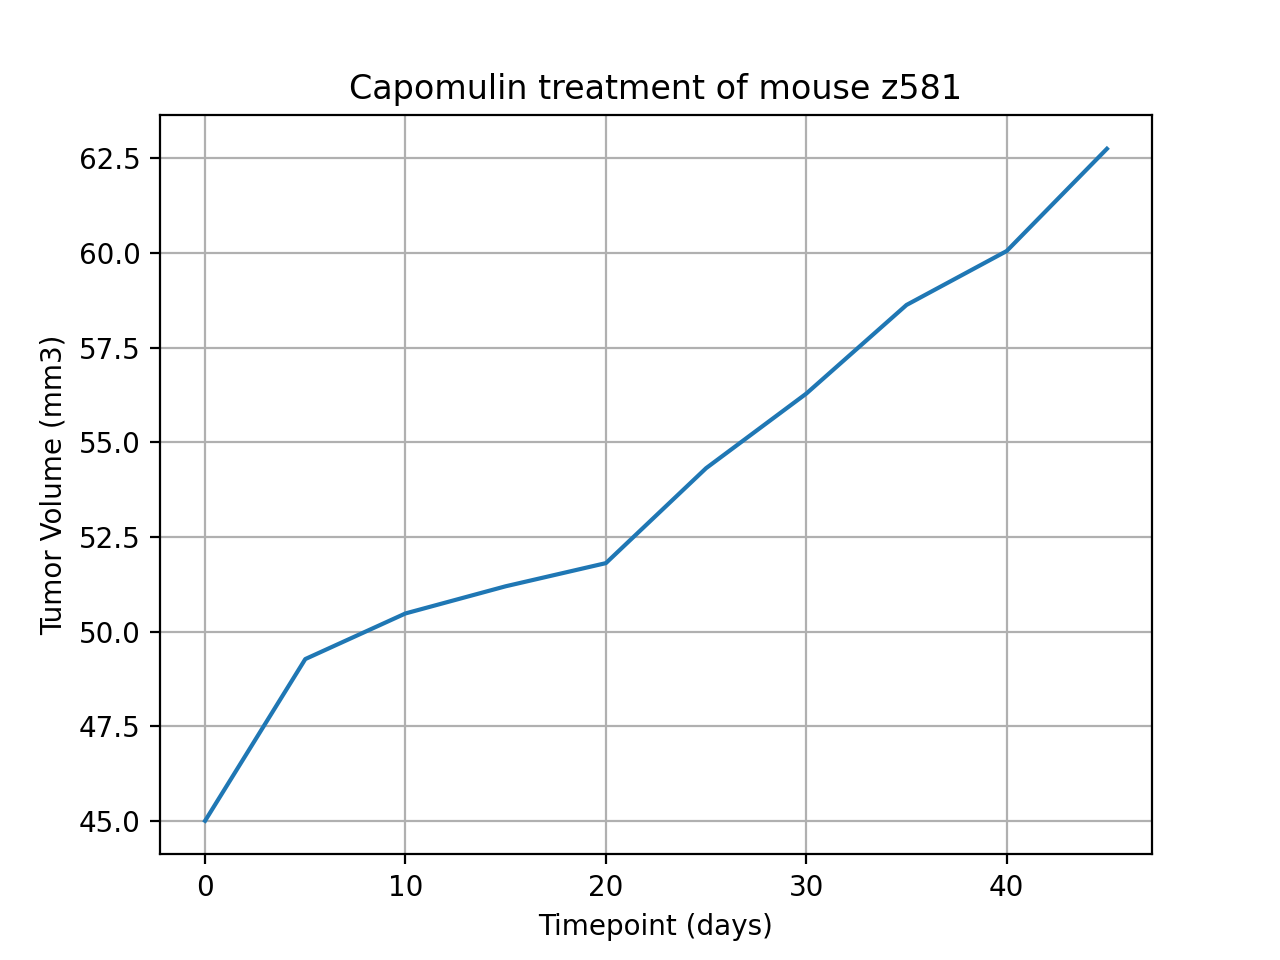

In [69]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin
capomulin_data = mouse_study_df.loc[mouse_study_df["Mouse ID"] == "z581"]

cap_timept = capomulin_data["Timepoint"]
cap_vol = capomulin_data["Tumor Volume (mm3)"]

x_axis = np.arange(0,45,0.5)

plt.plot(cap_timept, cap_vol)

plt.xlabel("Timepoint (days)")
plt.ylabel("Tumor Volume (mm3)")
plt.title("Capomulin treatment of mouse z581")
plt.grid()
plt.show()

<IPython.core.display.Javascript object>


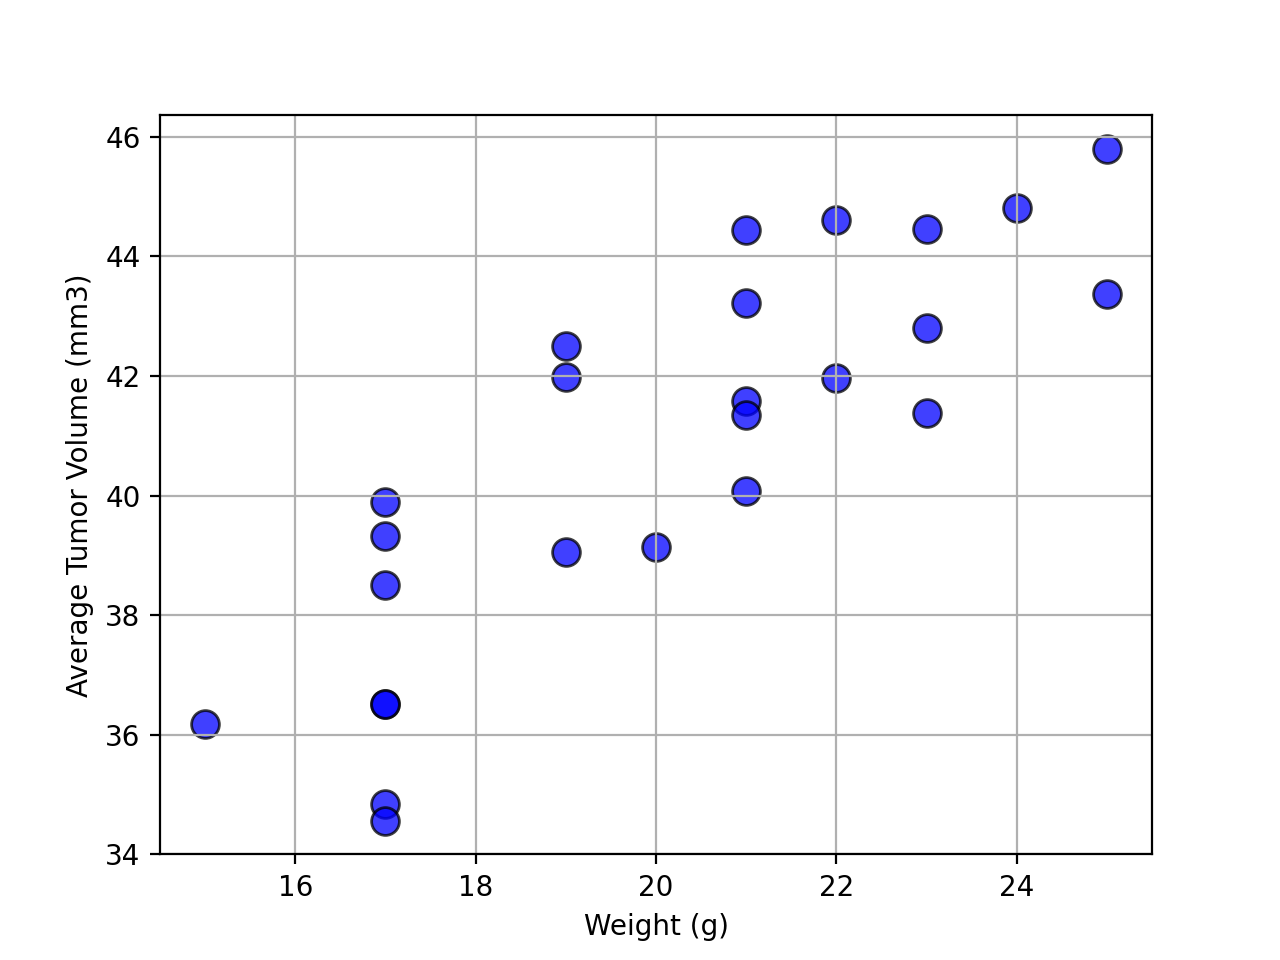

In [70]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen
Capomulin_reg = mouse_study_df.loc[mouse_study_df["Drug Regimen"] == "Capomulin"]
capo_group = Capomulin_reg.groupby(['Mouse ID']).mean()

tumorvol_mean = capo_group['Tumor Volume (mm3)']
tumorwgt_mean = capo_group['Weight (g)']

plt.scatter(tumorwgt_mean, tumorvol_mean, marker="o", facecolors="blue", edgecolors="black",
            s=100, alpha=0.75)
plt.xlabel("Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")
plt.grid()
plt.show()


## Correlation and Regression

The correlation between mouse weight and the average tumor volume is 0.84


<IPython.core.display.Javascript object>


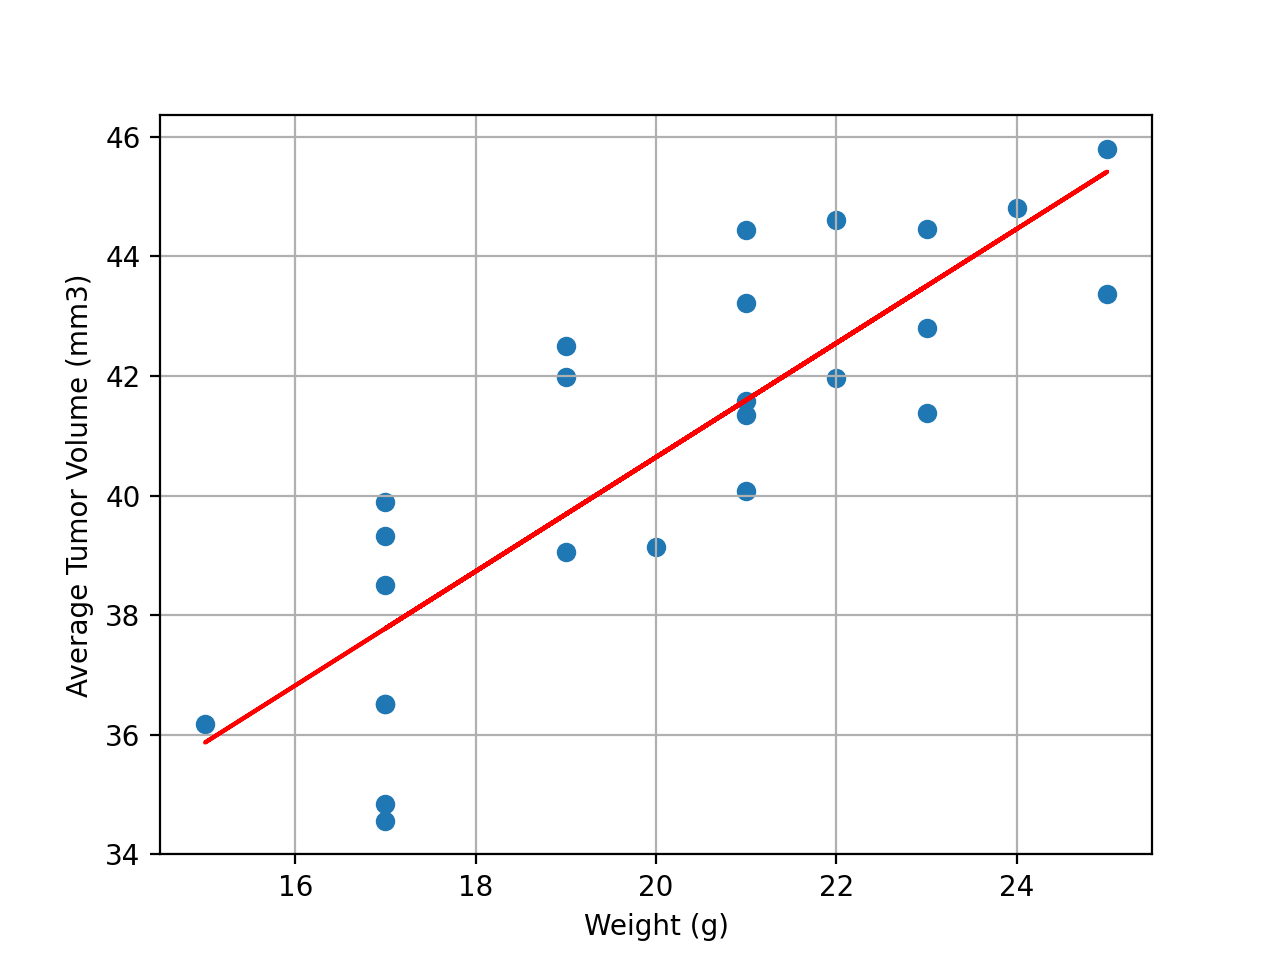

In [77]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
correlation = st.pearsonr(tumorwgt_mean,tumorvol_mean)
print(f"The correlation between mouse weight and the average tumor volume is {round(correlation[0],2)}")
(slope, intercept, rvalue, pvalue, stderr) = linregress(tumorwgt_mean, tumorvol_mean)
regressvalues = slope * tumorwgt_mean  + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(tumorwgt_mean,tumorvol_mean)
plt.plot(tumorwgt_mean,regressvalues,"r-")
plt.xlabel("Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")
plt.grid()
